<a href="https://colab.research.google.com/github/unclepete-20/lab2-md-clasificacion/blob/master/lab2_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio #2 Clasificacion
#### Integrantes:

- Pedro Pablo Arriola Jiménez (20188)
- Gabriel Alejandro Vicente Lorenzo (20498)



###### Descripción: La Universidad de California en Irving (UCI) tiene un repositorio de datos sin igual.  Allí se pueden encontrar datos de cualquier tipo para practicar el desarrollo de modelos, etc.  En esta   oportunidad   se   ha   seleccionado   un   conjunto   de   datos   que   sirve   para   clasificar imágenes identificando si una paciente tiene cáncer de la mama o no.  

## Parte 1.1 – Limpieza de los datos

In [34]:
# Se inicia importando las librerias necesarias para o

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Ahora se importan los datos y se cargan a un DataFrame de Pandas

# Por comodidad, los datos fueron trasladados a un archivo CSV y se agregaron los nombres de las columnas
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [36]:
# Se inicia explorando el head del dataframe

data.head()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
# Posteriormente se explora el final del dataframe para observar si los datos estan correctos

data.tail()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [38]:
# Observemos la forma que tiene nuestro dataframe

data.shape

(699, 11)

In [39]:
# Es importante hacer una exploracion y conteo de los datos para ver que no existan discrepancias

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_cell_size         699 non-null    int64 
 3   uniformity_cell_shape        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [40]:
# Existe uno o varios valores que causan inconvenientes con el tipo de datos
# A continuacion se explora cuales son dichos datos para realizar los cambios convenientes

rare_values = data.select_dtypes('object')

rare_values

,bare_nuclei
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


In [41]:
# Se puede observar que hay valores ?, lo cual afecta la calidad de los datos
# replace non-numeric values with NaN
data['bare_nuclei'] = pd.to_numeric(data['bare_nuclei'], errors='coerce')

# convert the column to int64
data['bare_nuclei'] = data['bare_nuclei'].astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id_number                    699 non-null    int64
 1   clump_thickness              699 non-null    int64
 2   uniformity_cell_size         699 non-null    int64
 3   uniformity_cell_shape        699 non-null    int64
 4   marginal_adhesion            699 non-null    int64
 5   single_epithelial_cell_size  699 non-null    int64
 6   bare_nuclei                  683 non-null    Int64
 7   bland_chromatin              699 non-null    int64
 8   normal_nucleoli              699 non-null    int64
 9   mitoses                      699 non-null    int64
 10  class                        699 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 60.9 KB


In [42]:
data

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [43]:
# Se borran los valores NaN para evitar afectar la calidad de los datos

data = data.dropna()

# Ahora ya podemos proceder con la descripcion y analisis exploratorio mas a fondo
data

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [44]:
# También se borrará la columna de id_number ya que no aporta ningun dato valioso

data.drop('id_number', axis=1, inplace=True)

data

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## Parte 1.2 - Análisis exploratorio de los datos

#### Explicacion de las variables

##### Es importante mencionar que todas la variables del dataset son de tipo cuantitativas continuas debido a que presentan un patrón indefinido entre los datos; cada caso difiere uno del otro y no es posible contar la cantidad de personas que han sido y serán afectadas con dicha enfermedad.

###### Each event consists of 9 cytological features: (1) clump thickness, indicating grouping of cancer cells in multilayer; (2) uniformity of cell size, indicating metastasis to lymph nodes; (3) uniformity of cell shapes, identifying cancerous cells of varying size; (4) marginal adhesion, suggesting loss of adhesion, i.e., a sign of malignancy but the cancerous cells lose this property so this retention of adhesion is an indication of malignancy; (5) single epithelial cell size (SECS), if the SECS become larger, it may be a malignant cell; (6) bare nuclei, without cytoplasm coating, found in benign tumors; (7) bland chromatin, usually found in benign cells; (8) normal nucleoli, generally very small in benign cells; (9) mitoses, the process in cell division by which the nucleus divides (Santiago-Montero, R., Sossa, H., Gutiérrez-Hernández, D. A., Zamudio, V., Hernández-Bautista, I., & Valadez-Godínez, S., 2020).

In [45]:
# Se hara una descripcion estadistica de los datos
data.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


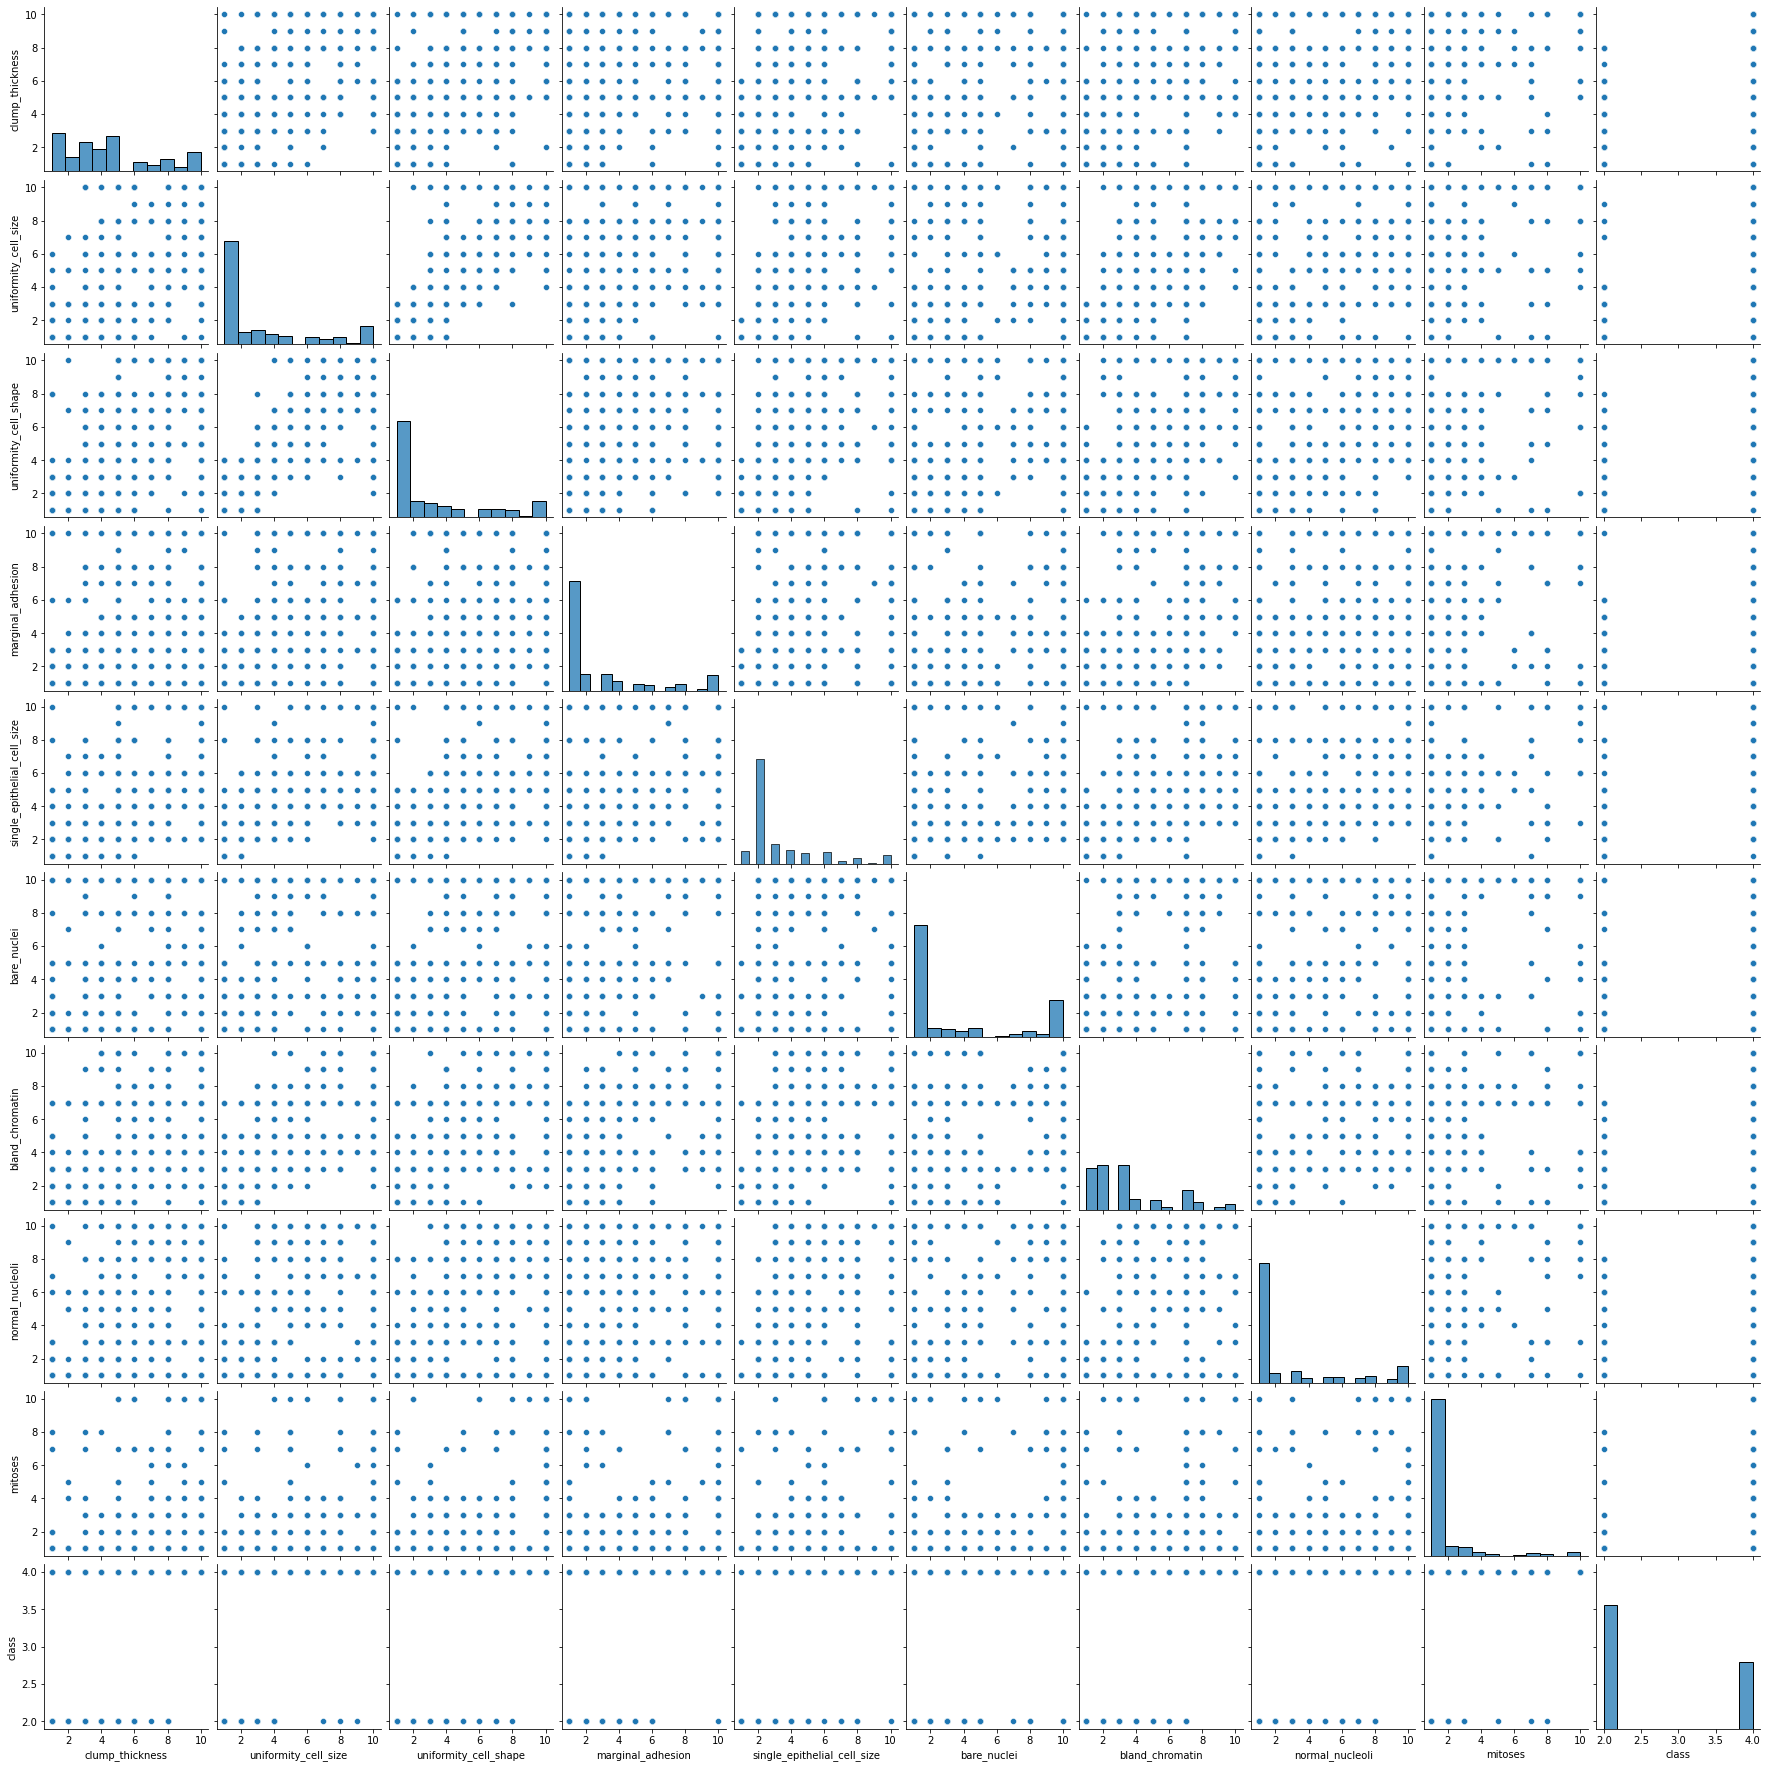

In [46]:
# Ahora se realizará una gráfica de pares para observar el comportamiento con todas las variables
sns.pairplot(data)

[Text(0.5, 1.0, 'Conteo de clump_thickness por intervalo de 1 a 10')]

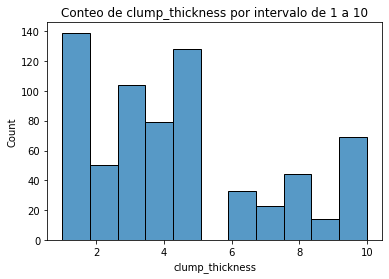

In [47]:
# Histogramas
sns.histplot(data, x='clump_thickness').set(title="Conteo de clump_thickness por intervalo de 1 a 10")

[Text(0.5, 1.0, 'Conteo de uniformity_cell_size por intervalo de 1 a 10')]

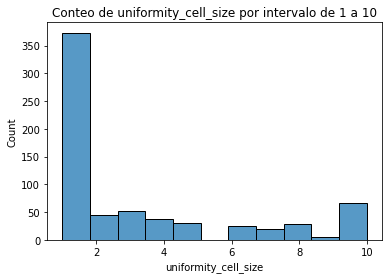

In [48]:
sns.histplot(data, x='uniformity_cell_size').set(title="Conteo de uniformity_cell_size por intervalo de 1 a 10")

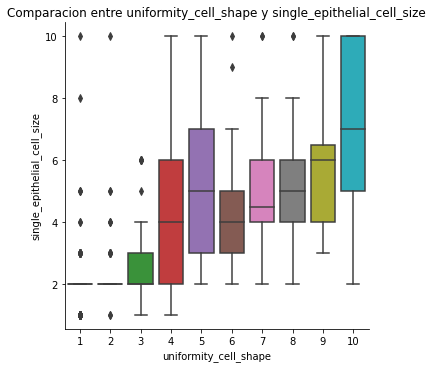

In [49]:
sns.catplot(data=data, x="uniformity_cell_shape", y="single_epithelial_cell_size", kind="box").set(title='Comparacion entre uniformity_cell_shape y single_epithelial_cell_size')

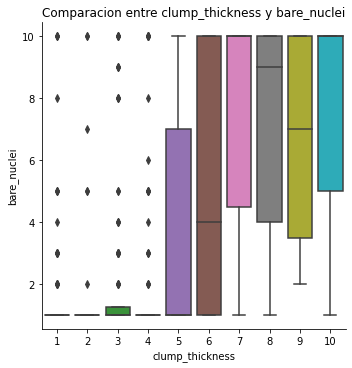

In [50]:
sns.catplot(data=data, x="clump_thickness", y="bare_nuclei", kind="box").set(title="Comparacion entre clump_thickness y bare_nuclei")

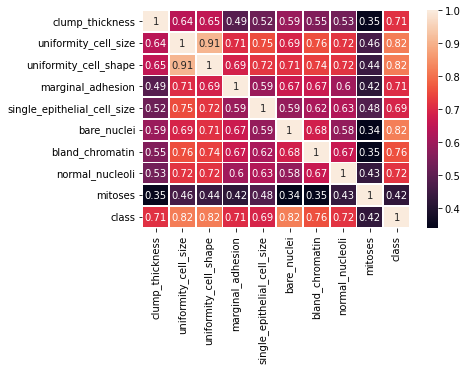

In [51]:
# Ahora observaremos la correlacion que existe entre las variables

correlation = data.corr()
sns.heatmap(correlation, annot=True, linewidth=.8)

In [52]:
# Tambien se aplica una tabla de frecuencia de los datos para observar el conteo de los datos que hay en el dataset
data['clump_thickness'].value_counts()

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: clump_thickness, dtype: int64

In [53]:
data['uniformity_cell_size'].value_counts()

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: uniformity_cell_size, dtype: int64

In [54]:
data['uniformity_cell_shape'].value_counts()

1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: uniformity_cell_shape, dtype: int64

In [55]:
data['marginal_adhesion'].value_counts()

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: marginal_adhesion, dtype: int64

In [56]:
data['single_epithelial_cell_size'].value_counts()

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: single_epithelial_cell_size, dtype: int64

In [57]:
data['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: Int64

In [58]:
data['bland_chromatin'].value_counts()

3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: bland_chromatin, dtype: int64

In [59]:
data['normal_nucleoli'].value_counts()

1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: normal_nucleoli, dtype: int64

In [60]:
data['mitoses'].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

In [61]:
data['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

# 2.1 - Regresión Logística

In [62]:
# Se importan las librerias para desarrollar el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
# Se cambiaran los valores: 0 si es benigno y 1 si es maligno
data.loc[data['class'] == 4, 'class'] = 1
data.loc[data['class'] == 2, 'class'] = 0

data

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [68]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print(f'\nMatriz de confusión:\n{confusion}')
print(f'\nReporte de clasificación:\n{classification}')

Precisión del modelo: 0.9560975609756097

Matriz de confusión:
[[125   2]
 [  7  71]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



# 2.2 - K-NN

# Bibliografía

- Santiago-Montero, R., Sossa, H., Gutiérrez-Hernández, D. A., Zamudio, V., Hernández-Bautista, I., & Valadez-Godínez, S. (2020). Novel Mathematical Model of Breast Cancer Diagnostics Using an Associative Pattern Classification. Diagnostics, 10(3), 136. https://doi.org/10.3390/diagnostics10030136